In [100]:
import pandas as pd
data_url = "https://raw.githubusercontent.com/owid/covid-19-data/master/public/data/owid-covid-data.csv"
df = pd.read_csv(data_url)#.fillna(0).set_index("date")

In [101]:
df = df.fillna(0).set_index("date")
df.index = pd.to_datetime(df.index) 
dg = df[["iso_code","new_cases", "total_cases"]]
#dh = dg[dg["iso_code"].isin(("AUT","USA","ITA"))]
dh

,iso_code,new_cases,total_cases
date,,,
2020-02-25,AUT,2.0,2.0
2020-02-26,AUT,0.0,2.0
2020-02-27,AUT,1.0,3.0
2020-02-28,AUT,0.0,3.0
2020-02-29,AUT,6.0,9.0
...,...,...,...
2021-07-14,USA,31845.0,33947230.0
2021-07-15,USA,28412.0,33975642.0
2021-07-16,USA,79310.0,34054952.0


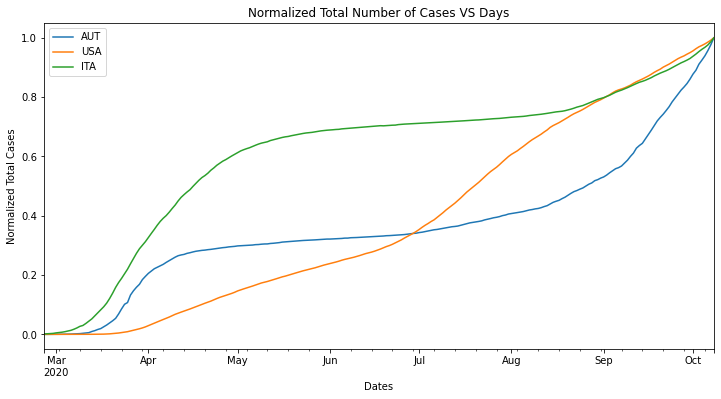

In [106]:
start_date = "2020-02-25"; end_date = "2020-10-08"
def dfstate(state, dh, st_dt, end_dt, ax):
    dfaut = dh[dh["iso_code"]==state]
    mask = (dfaut.index > start_date) & (dfaut.index <= end_date) 
    dfaut = dfaut.loc[mask]
    dfaut = dfaut.iloc[:,-2:].apply(lambda x: x/ x.max(), axis=0)
    dfaut["total_cases"].plot(ax = axs, label = state)

import matplotlib.pyplot as plt
fig, axs = plt.subplots(figsize=(12, 6))
states = ["AUT","USA","ITA"]
for state in states:
    dfstate(state, dh = dh,st_dt = start_date, end_dt = end_date, ax = axs)
plt.xlabel("Dates"); plt.ylabel("Normalized Total Cases"); plt.title("Normalized Total Number of Cases VS Days")
plt.legend()
plt.show()